In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_blobs


x,y = make_blobs(n_features=2, centers=3, n_samples=1000, random_state=23)
x.shape, y.shape

((1000, 2), (1000,))

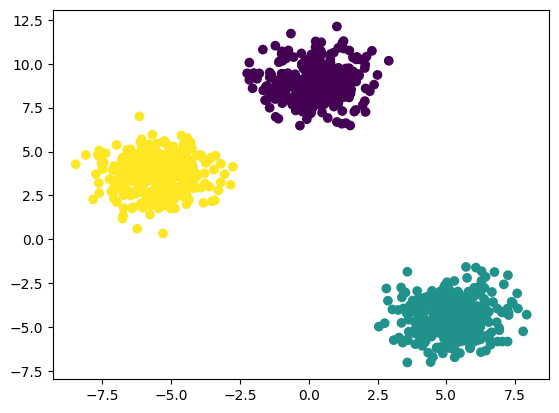

In [7]:
plt.scatter(x[:,0], x[:,1], c=y)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

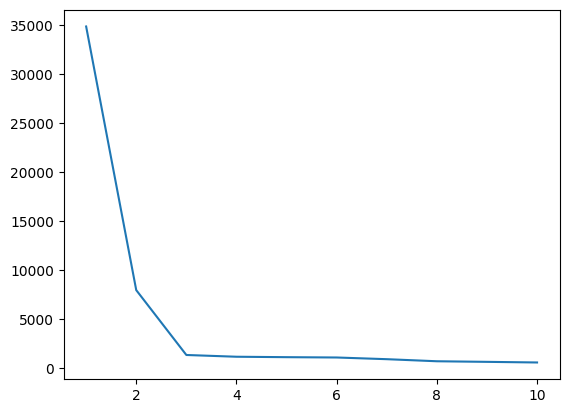

In [19]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_train)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)

In [20]:
km = KMeans(n_clusters=3, init='k-means++')
ypred_x_test =km.fit_predict(X_test)
ypred_x_train =km.fit_predict(X_train)
X_test.shape, ypred_x_test.shape

c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


((330, 2), (330,))

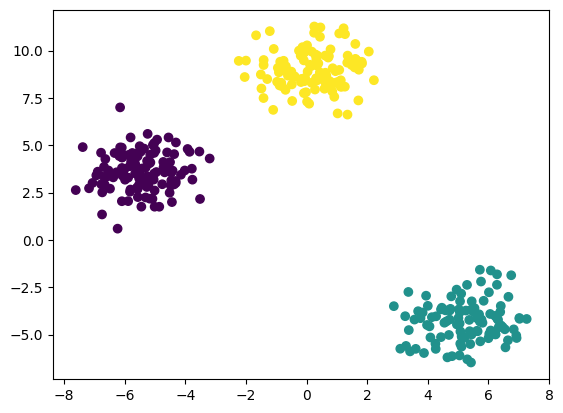

In [21]:
plt.scatter(X_test[:,0], X_test[:,1], c=ypred_x_test)

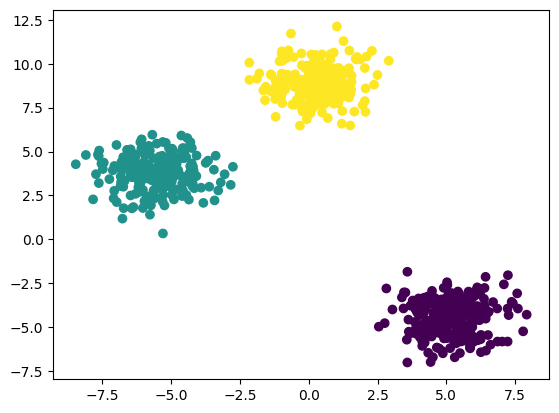

In [22]:
plt.scatter(X_train[:,0], X_train[:,1], c=ypred_x_train)

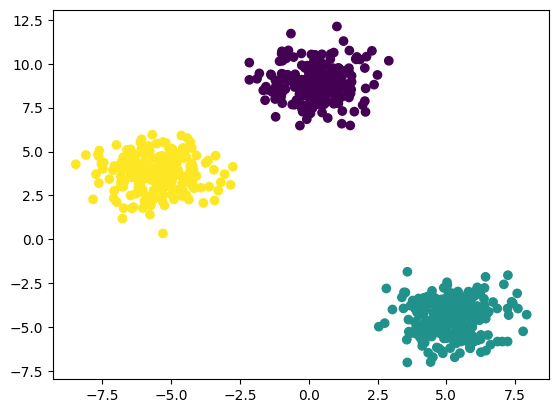

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [24]:
# to check the elbow point or the optimal number of clusters
from kneed import KneeLocator
KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing').elbow

3

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, ypred_x_train)

0.8071181203797672

In [26]:
silhouette_score(X_test, ypred_x_test)

0.8017590194495865